#### Prepare notebook with relevant modules

In [1]:
%pip install -U odp-sdk --quiet 2>/dev/null

Note: you may need to restart the kernel to use updated packages.


In [2]:
from odp_sdk.client import OdpClient # The SDK
from ODPworkspace_demotools import mapOQS, pydeck_plot
import pandas as pd

In [3]:
client = OdpClient()

### Get data identifiers from catalog and request data via API call
- Option 1) via API calls to the catalog
- Option 2) getting UUID or qualified name from the landing page:
https://app.hubocean.earth/catalog/dataset/1e3401d4-9630-40cd-a9cf-d875cb310449-emodnet-hydrocarbons
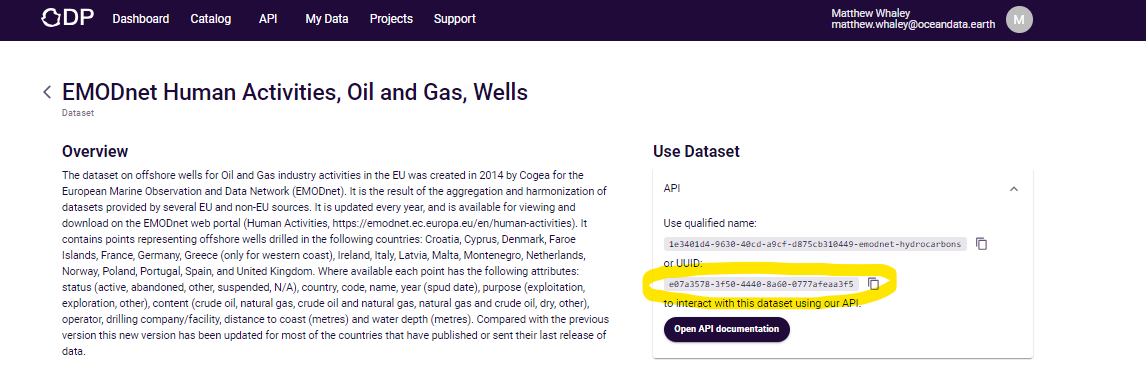

In [4]:
## Request the dataset from the catalog using the UUID:
OilWells_dataset = client.catalog.get("e07a3578-3f50-4440-8a60-0777afeaa3f5")
## Verify the name of the dataset requested
OilWells_dataset.metadata.display_name
## Request the data from the dataset
OilWells_data = client.tabular.select_as_list(OilWells_dataset, limit=1000)

In [5]:
Ports_dataset = client.catalog.get("7429bde7-980b-4c69-86ab-d33e0ed8bdbf")
Ports_dataset.metadata.display_name
Ports_data = client.tabular.select_as_list(Ports_dataset, limit=1000)

In [6]:
TeleCables_dataset = client.catalog.get("fb5ae11b-87c6-49c1-8aac-9481c228c9bb")
TeleCables_dataset.metadata.display_name
TeleCables_data = client.tabular.select_as_list(TeleCables_dataset, limit=1000)

## Visualize data

### Plot datapoints from query on a map

In [7]:
pydeck_plot([OilWells_data, Ports_data, TeleCables_data], pickable=True, zoom=3, lat=50, lon=10)

{
  "initialViewState": {
    "latitude": 50,
    "longitude": 10,
    "zoom": 3
  },
  "layers": [
    {
      "@@type": "GeoJsonLayer",
      "data": [
        {
          "COAST_DIST": 52990.2832323,
          "CODE": "Marica D DIR",
          "CONTENT": null,
          "COUNTRY": "Croatia",
          "DRILLING_C": null,
          "NAME": "MARICA D DIR",
          "OPERATOR": "INA-Industrija nafte d.d.",
          "PURPOSE": "Exploration",
          "STATUS": "Active",
          "WATER_DEPT": 0.0,
          "YEAR": 2022,
          "geometry": {
            "coordinates": [
              14.005792,
              44.071775
            ],
            "type": "Point"
          }
        },
        {
          "COAST_DIST": 53135.9760609,
          "CODE": "Ika B-1 R DIR",
          "CONTENT": null,
          "COUNTRY": "Croatia",
          "DRILLING_C": null,
          "NAME": "IKA B-1 R DIR",
          "OPERATOR": "INA-Industrija nafte d.d.",
          "PURPOSE": "Exploration",
          "STATUS": "Active",
          "WATER_DEPT": 0.0,
          "YEAR": 2021,
          "geometry": {
            "coordinates": [
              13.438411,
              44.404878
            ],
            "type": "Point"
          }
        },
        {
          "COAST_DIST": 38458.9780816,
          "CODE": "Irena-2",
          "CONTENT": null,
          "COUNTRY": "Croatia",
          "DRILLING_C": null,
          "NAME": "IRENA-2",
          "OPERATOR": "INAGIP",
          "PURPOSE": "Exploration",
          "STATUS": "Active",
          "WATER_DEPT": 0.0,
          "YEAR": 2020,
          "geometry": {
            "coordinates": [
              13.123922,
              45.019867
            ],
            "type": "Point"
          }
        },
        {
          "COAST_DIST": 59103.7885871,
          "CODE": "Ika-JZ-2 DIR",
          "CONTENT": "Natural Gas",
          "COUNTRY": "Croatia",
          "DRILLING_C": null,
          "NAME": "IKA-JZ-2 DIR",
          "OPERATOR": "INAGIP",
          "PURPOSE": "Exploitation",
          "STATUS": "Active",
          "WATER_DEPT": 0.0,
          "YEAR": 2014,
          "geometry": {
            "coordinates": [
              13.573409,
              44.276328
            ],
            "type": "Point"
          }
        },
        {
          "COAST_DIST": 59102.8079758,
          "CODE": "Ika-JZ-3 DIR",
          "CONTENT": "Natural Gas",
          "COUNTRY": "Croatia",
          "DRILLING_C": null,
          "NAME": "IKA-JZ-3 DIR",
          "OPERATOR": "INAGIP",
          "PURPOSE": "Exploitation",
          "STATUS": "Active",
          "WATER_DEPT": 0.0,
          "YEAR": 2014,
          "geometry": {
            "coordinates": [
              13.573438,
              44.276328
            ],
            "type": "Point"
          }
        },
        {
          "COAST_DIST": 59101.8547564,
          "CODE": "Ika-JZ-4 DIR",
          "CONTENT": "Natural Gas",
          "COUNTRY": "Croatia",
          "DRILLING_C": null,
          "NAME": "IKA-JZ-4 DIR",
          "OPERATOR": "INAGIP",
          "PURPOSE": "Exploitation",
          "STATUS": "Active",
          "WATER_DEPT": 0.0,
          "YEAR": 2014,
          "geometry": {
            "coordinates": [
              13.573396,
              44.276351
            ],
            "type": "Point"
          }
        },
        {
          "COAST_DIST": 59099.0819433,
          "CODE": "Ika-JZ-5 DIR",
          "CONTENT": "Natural Gas",
          "COUNTRY": "Croatia",
          "DRILLING_C": null,
          "NAME": "IKA-JZ-5 DIR",
          "OPERATOR": "INAGIP",
          "PURPOSE": "Exploitation",
          "STATUS": "Active",
          "WATER_DEPT": 0.0,
          "YEAR": 2014,
          "geometry": {
            "coordinates": [
              13.573409,
              44.276375
            ],
            "type": "Point"
          }
        },
        {
          "COAST_DIST": 54024.7616479,
          "CODE": "Ika A-4 HOR",
          "CONTENT"

### Inspect data
Option 1): transform list of datapoints to a dataframe

In [8]:
pd.DataFrame(OilWells_data).head()

NAME DRILLING_C  \
0   MARICA D DIR       None   
1  IKA B-1 R DIR       None   
2        IRENA-2       None   
3   IKA-JZ-2 DIR       None   
4   IKA-JZ-3 DIR       None   

                                            geometry    YEAR  STATUS  \
0  {'type': 'Point', 'coordinates': [14.005792, 4...  2022.0  Active   
1  {'type': 'Point', 'coordinates': [13.438411, 4...  2021.0  Active   
2  {'type': 'Point', 'coordinates': [13.123922, 4...  2020.0  Active   
3  {'type': 'Point', 'coordinates': [13.573409, 4...  2014.0  Active   
4  {'type': 'Point', 'coordinates': [13.573438, 4...  2014.0  Active   

        PURPOSE                   OPERATOR  WATER_DEPT  COUNTRY      CONTENT  \
0   Exploration  INA-Industrija nafte d.d.         0.0  Croatia         None   
1   Exploration  INA-Industrija nafte d.d.         0.0  Croatia         None   
2   Exploration                     INAGIP         0.0  Croatia         None   
3  Exploitation                     INAGIP         0.0  Croatia  Natural Gas   
4  Exploitation                     INAGIP         0.0  Croatia  Natural Gas   

     COAST_DIST           CODE @@next  
0  52990.283232   Marica D DIR    NaN  
1  53135.976061  Ika B-1 R DIR    NaN  
2  38458.978082        Irena-2    NaN  
3  59103.788587   Ika-JZ-2 DIR    NaN  
4  59102.807976   Ika-JZ-3 DIR    NaN

Option 2): use 'tabular.select_as_dataframe' function of the SDK

In [9]:
OilWells_df = client.tabular.select_as_dataframe(OilWells_dataset)
OilWells_df.head()

NAME DRILLING_C  \
0   MARICA D DIR       None   
1  IKA B-1 R DIR       None   
2        IRENA-2       None   
3   IKA-JZ-2 DIR       None   
4   IKA-JZ-3 DIR       None   

                                            geometry  YEAR  STATUS  \
0  {'type': 'Point', 'coordinates': [14.005792, 4...  2022  Active   
1  {'type': 'Point', 'coordinates': [13.438411, 4...  2021  Active   
2  {'type': 'Point', 'coordinates': [13.123922, 4...  2020  Active   
3  {'type': 'Point', 'coordinates': [13.573409, 4...  2014  Active   
4  {'type': 'Point', 'coordinates': [13.573438, 4...  2014  Active   

        PURPOSE                   OPERATOR  WATER_DEPT  COUNTRY      CONTENT  \
0   Exploration  INA-Industrija nafte d.d.         0.0  Croatia         None   
1   Exploration  INA-Industrija nafte d.d.         0.0  Croatia         None   
2   Exploration                     INAGIP         0.0  Croatia         None   
3  Exploitation                     INAGIP         0.0  Croatia  Natural Gas   
4  Exploitation                     INAGIP         0.0  Croatia  Natural Gas   

     COAST_DIST           CODE  
0  52990.283232   Marica D DIR  
1  53135.976061  Ika B-1 R DIR  
2  38458.978082        Irena-2  
3  59103.788587   Ika-JZ-2 DIR  
4  59102.807976   Ika-JZ-3 DIR

In [10]:
Ports_df = client.tabular.select_as_dataframe(Ports_dataset)
Ports_df

TRAFFIC PORT_ID    PORT_NAME CNTR_CODE          REP_MAR_L     POINT_X  \
0          1   BE003         None        BE     Antwerp-Bruges    4.375671   
1          1   BEANR    Antwerpen        BE          Antwerpen    4.375671   
2          1   BEGNE         Gent        BE       Gent (Ghent)    3.741699   
3          1   BEOST     Oostende        BE  Oostende (Ostend)    2.921875   
4          1   BEZEE    Zeebrugge        BE          Zeebrugge    3.197265   
..       ...     ...          ...       ...                ...         ...   
995        0   CAMTR     Montreal        CA               None  -73.550903   
996        0   CATOR      Toronto        CA               None  -79.348389   
997        0   CAVAN    Vancouver        CA               None -123.120300   
998        0   CCCCK  Port Refuge        CC               None   96.832703   
999        0   CDBNW       Banana        CD               None   12.405090   

    SOURCE  DATA_SRC_C    POINT_Y PORT_COOR_  \
0    GISCO           0  51.253906       None   
1    GISCO        2110  51.253906          1   
2    GISCO        2110  51.085083          1   
3    GISCO        2110  51.235107          1   
4    GISCO        2110  51.363025          1   
..     ...         ...        ...        ...   
995  GISCO        2101  45.507690          1   
996  GISCO        2101  43.634888          1   
997  GISCO        2101  49.270508          1   
998  GISCO        2101 -12.132080          1   
999  GISCO        2101  -5.998718          1   

                                              geometry  
0    {'type': 'Point', 'coordinates': [4.375671, 51...  
1    {'type': 'Point', 'coordinates': [4.375671, 51...  
2    {'type': 'Point', 'coordinates': [3.741699, 51...  
3    {'type': 'Point', 'coordinates': [2.921875, 51...  
4    {'type': 'Point', 'coordinates': [3.197265, 51...  
..                                                 ...  
995  {'type': 'Point', 'coordinates': [-73.550903, ...  
996  {'type': 'Point', 'coordinates': [-79.348389, ...  
997  {'type': 'Point', 'coordinates': [-123.1203, 4...  
998  {'type': 'Point', 'coordinates': [96.832703, -...  
999  {'type': 'Point', 'coordinates': [12.40509, -5...  

[1000 rows x 11 columns]

In [11]:
TeleCables_df = client.tabular.select_as_dataframe(TeleCables_dataset)
TeleCables_df

status  featureid                                  uuid  Shape_Leng  \
0      inUse        682  0021f8af-ca60-4402-9f5f-27a299ed3178    2.452990   
1   OutOfUse        702  3e4f6663-c3e4-41ad-a750-55ea8c9dbca3    1.284908   
2   OutOfUse        712  a3a3bb93-90f6-40b1-a24e-d2fe46d0cddf    2.363191   
3      inUse        722  c042bc76-4f6c-40ab-be79-70e7ec94bca3    0.770717   
4   OutOfUse        742  f2d441d6-b337-41da-a272-cac833452ff6    0.988272   
5   OutOfUse        752  b89e4f22-bf4f-4473-a653-288281b1313d    1.977794   
6   OutOfUse        762  fd3e98dc-da84-424b-acb3-1f18acedfdc8    1.076905   
7   OutOfUse        772  0c0d226c-f5c2-43e4-89d8-7214e239d2f1    1.666938   
8    Unknown        792  a8421462-fd0c-467c-ad0f-3a741d3457b3    0.088018   
9      inUse        872  681adaec-d9a0-456c-9343-d91be9b899d4    0.259974   
10  OutOfUse        882  31f38f6d-a58b-4c67-ae2a-9a47e185630a    0.124697   
11     inUse        892  30ff2270-9eaf-4f28-b0b6-8b6161546338    0.237459   
12     inUse        902  463a7f31-c616-4c76-93d7-6779019f6066    0.240832   
13     inUse        912  02dee361-4681-4bf2-b89a-50da93bbf56e    2.472430   
14     inUse        922  7a6ec408-60b0-4f46-a84f-490248e3a31c    0.177556   
15  OutOfUse        932  916363d4-f516-4cba-a9dd-fe3d465dabb7    2.121186   
16     inUse        952  4b5e1934-c431-4e53-a196-2efc6a4cfac3    0.201446   
17  OutOfUse        962  93f8e9bf-2b17-44ff-b859-d3d1ea188d74    2.327882   
18  OutOfUse        972  0d5d9917-d17c-40c6-830c-4c3852ab20ad    1.093830   
19  OutOfUse        982  047a46c6-95dc-428e-ba93-e9474e9b9ec1    2.644271   
20   Unknown        992  ef63836b-ff65-46bf-a437-0f7b876ccd29    0.942037   
21   Unknown       1002  67483dc8-a550-43c9-b706-71481770ab7b    0.114586   
22     inUse      20412  907c356b-565b-4052-bf95-b3ad001c759e    2.071621   
23  OutOfUse      20422  8e729d6b-8dda-4df9-b30a-844a55ae3565    2.113124   
24  OutOfUse      20432  07cc5533-fce6-477a-b387-49c9b5d7f38d    1.908192   
25  OutOfUse      20442  a0e4fec5-e94f-4f75-ad01-0ed6f4393c72    1.300209   
26     inUse     154662  c6169e9f-62be-4891-9fd4-3774b7b1f5a4    1.286271   
27  Approved     155162  4c64782c-df65-4c30-bcb2-303d843eef3c    0.749043   

     featuretyp           featurespe  \
0   Data Cables  FiberOpticDataCable   
1   Data Cables  FiberOpticDataCable   
2   Data Cables  FiberOpticDataCable   
3   Data Cables  FiberOpticDataCable   
4   Data Cables  FiberOpticDataCable   
5   Data Cables  FiberOpticDataCable   
6   Data Cables  FiberOpticDataCable   
7   Data Cables  FiberOpticDataCable   
8   Data Cables  FiberOpticDataCable   
9   Data Cables  FiberOpticDataCable   
10  Data Cables  FiberOpticDataCable   
11  Data Cables  FiberOpticDataCable   
12  Data Cables  FiberOpticDataCable   
13  Data Cables  FiberOpticDataCable   
14  Data Cables  FiberOpticDataCable   
15  Data Cables  FiberOpticDataCable   
16  Data Cables  FiberOpticDataCable   
17  Data Cables        CoaxDataCable   
18  Data Cables  FiberOpticDataCable   
19  Data Cables  FiberOpticDataCable   
20  Data Cables  FiberOpticDataCable   
21  Data Cables  FiberOpticDataCable   
22  Data Cables  FiberOpticDataCable   
23  Data Cables  FiberOpticDataCable   
24  Data Cables  FiberOpticDataCable   
25  Data Cables  FiberOpticDataCable   
26  Data Cables              Unknown   
27  Data Cables  FiberOpticDataCable   

                                             geometry  \
0   {'type': 'LineString', 'coordinates': [[6.0817...   
1   {'type': 'LineString', 'coordinates': [[7.2825...   
2   {'type': 'MultiLineString', 'coordinates': [[[...   
3   {'type': 'LineString', 'coordinates': [[7.0515...   
4   {'type': 'LineString', 'coordinates': [[7.2185...   
5   {'type': 'LineString', 'coordinates': [[6.5978...   
6   {'type': 'LineString', 'coordinates': [[6.1389...   
7   {'type': 'MultiLineString', 'coordinates': [[[...   
8   {'type': 'LineString', 'coordinates': [[8.3767...   
9   {'type': 'LineString', 'coordinates':